# Netflix Movie and TV Show Production Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
netflix = pd.read_excel('Netflix_Titles.xlsx', sheet_name = 'Table1')

In [3]:
title = pd.DataFrame(data = netflix)

In [4]:
T_V2 = title[['Country', 'Show_ID']].groupby('Country').count().sort_values(by = 'Show_ID', ascending = False).reset_index()

In [19]:
s = T_V2.where(T_V2['Show_ID'] > 2600).dropna().sort_values(by = 'Show_ID', ascending = True)

In [6]:
title['Show_ID'] = title['Show_ID'].astype(int)

In [7]:
Genre = title[['Listed_In', 'Show_ID']].groupby('Listed_In').count().reset_index()

In [8]:
title['Show_ID'] = title['Show_ID'].astype(int)

In [9]:
rating = title[['Rating', 'Show_ID']].groupby('Rating').count()

In [10]:
Type = pd.pivot_table(title, values = 'Show_ID', index = ['Date_Added', 'Type'], aggfunc = len).reset_index()

In [11]:
year = pd.pivot_table(title, values = 'Show_ID', index = ['Type', 'Release_Year'], aggfunc = len).reset_index()

__The following horizontal bar graph lists the countries, that produced the greatest quantity of Netflix movies.__

__Currently, the United States leads in Netflix movies production, with India following.__

<Figure size 720x720 with 0 Axes>

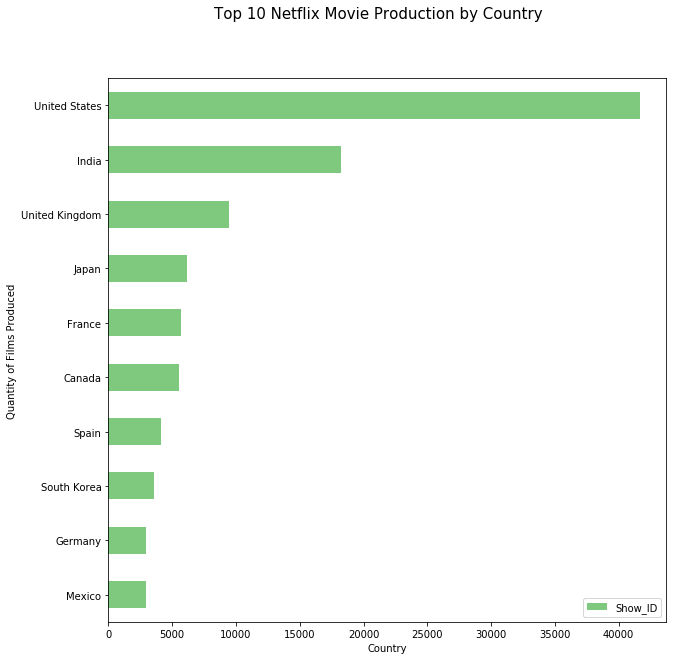

In [20]:
plt.figure(figsize = (10,10))
s.plot(kind = 'barh', x = 'Country', y = 'Show_ID', figsize = (10,10), colormap = 'Accent')
plt.suptitle('Top 10 Netflix Movie Production by Country', fontsize = 15)
plt.ylabel('Quantity of Films Produced')
plt.xlabel('Country')
plt.show()

__The following bar graph displays the total quantity of movies products per genre.__

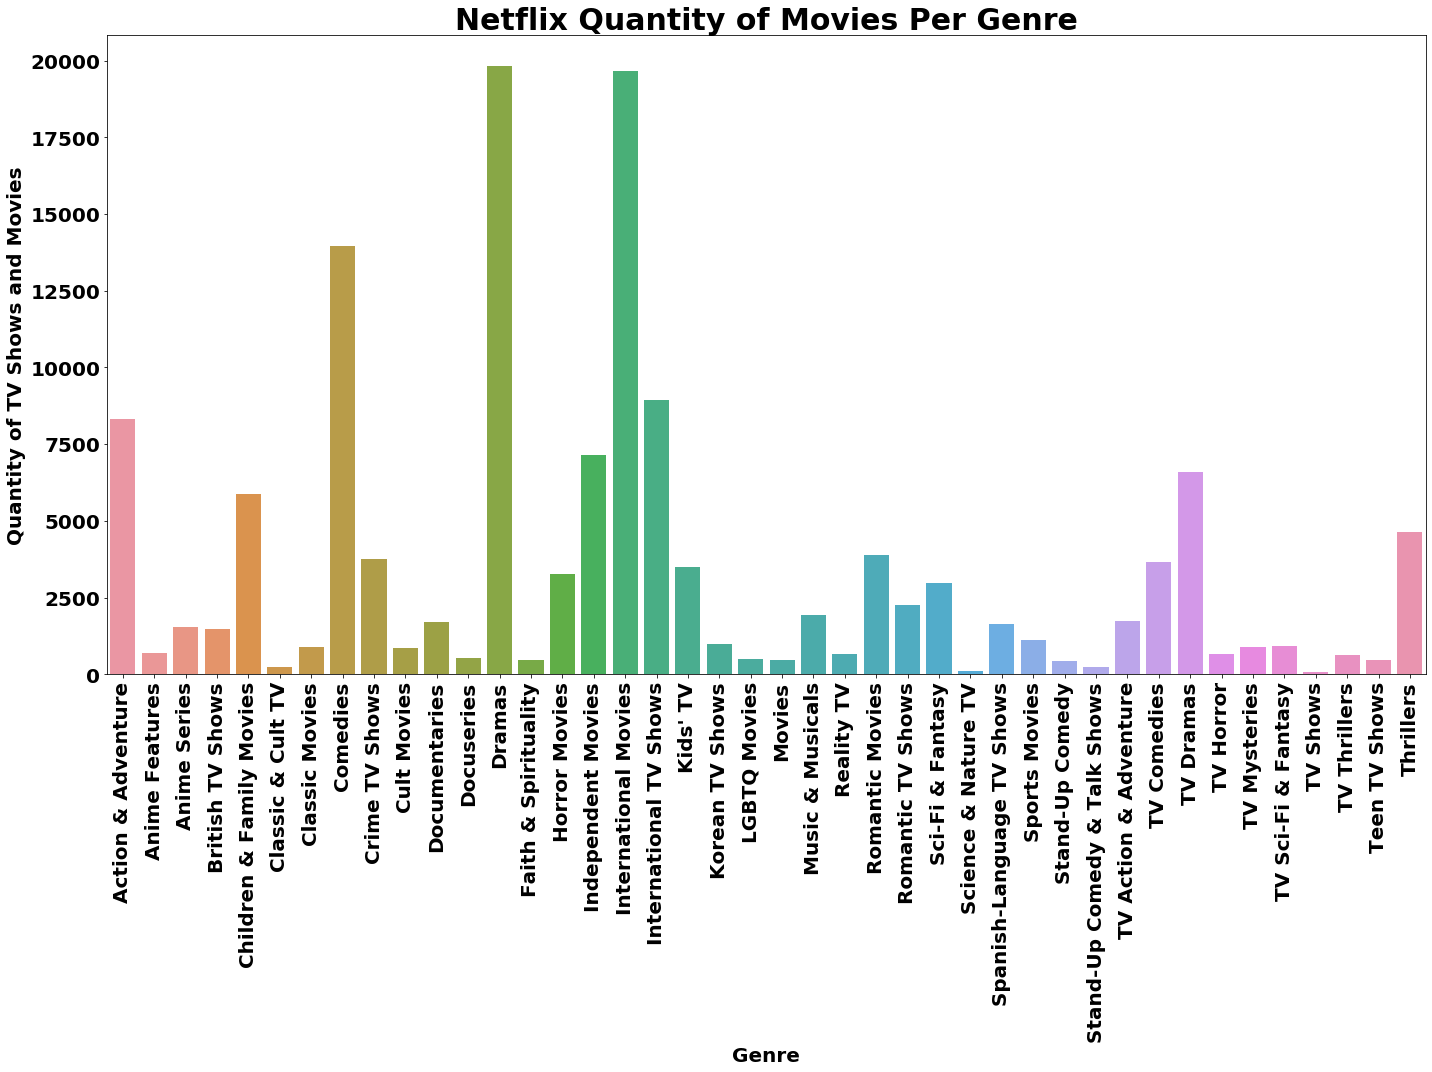

In [53]:
plt.figure(figsize = (20,15))
plt.title('Netflix Quantity of Movies Per Genre', size = 30, weight = 'bold')
g = sns.barplot(data = Genre, x = 'Listed_In', y = 'Show_ID')
g.set_ylabel('Quantity of TV Shows and Movies', size = 20, weight = 'bold')
g.set_xlabel('Genre', size = 20, weight = 'bold')
plt.xticks(rotation = 90, size = 20, weight = 'bold')
plt.yticks(size = 20, weight = 'bold')
plt.tight_layout()
plt.show()

__The following pie chart displays the total percentages of movies produced in Netflix per rating.__

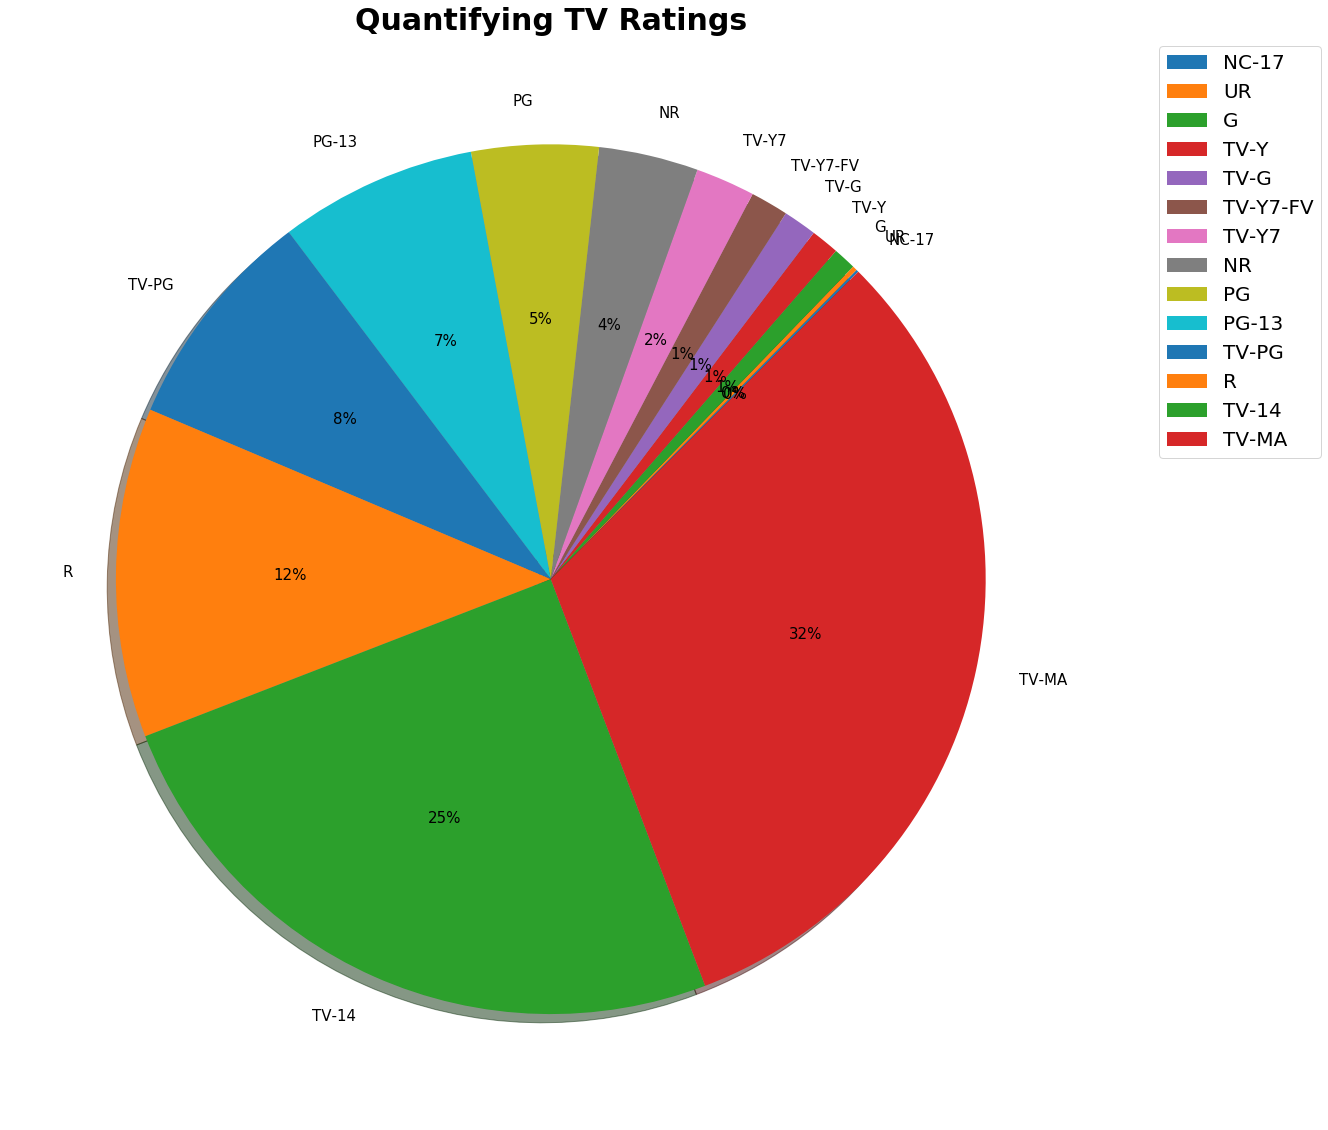

In [44]:
rating.sort_values(by = 'Show_ID', ascending = True).plot(kind = 'pie', y = 'Show_ID', subplots = False, figsize = (20,20), shadow = True, startangle = 45, autopct='%1.0f%%', fontsize = 15)
plt.title('Quantifying TV Ratings', size = 30, weight = 'bold')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 20)
plt.show()

__The following line graph visualizes the amount of TV Shows and Movies produced, over time.__

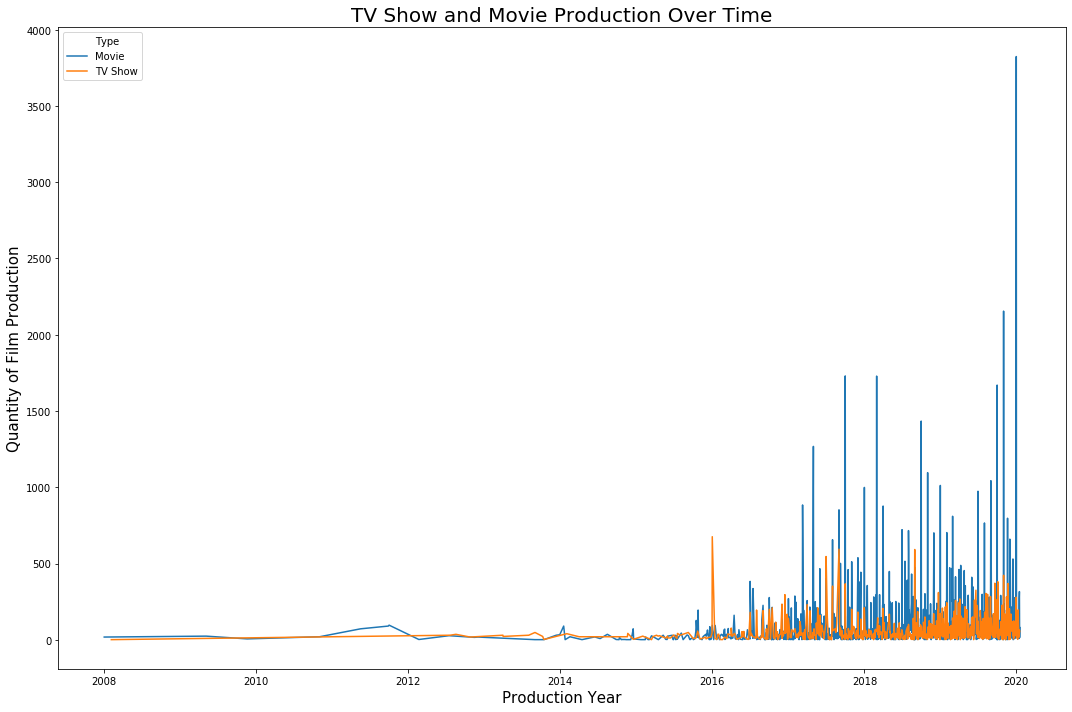

In [15]:
plt.figure(figsize = (15,10))
l = sns.lineplot(data = Type, hue = 'Type', x = 'Date_Added', y = 'Show_ID')
plt.title('TV Show and Movie Production Over Time', fontsize = 20)
l.set_ylabel('Quantity of Film Production', fontsize = 15)
l.set_xlabel('Production Year', fontsize = 15)
plt.tight_layout()
plt.show()